In [21]:
import pandas as pd
from pandas import Series
filename = 'F:\Python\data\iris.data'
data = pd.read_csv(filename, header = None)
data.columns = ['sepal length','sepal width','petal length','petal width','class']
data.iloc[0:5,:]


,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


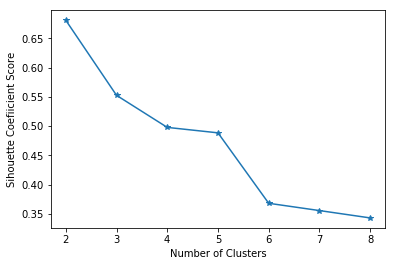

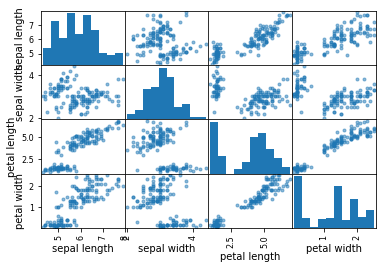

In [22]:
import matplotlib.pyplot as plt
pd.scatter_matrix(data, diagonal='hist')
plt.show()

In [23]:
X = data.iloc[:,0:4].values.astype(float)   #准备数据
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)   #模型初始化
kmeans.fit(X)                      #训练模型

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

means.lables_:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


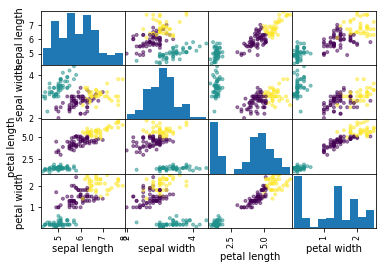

In [24]:
print("means.lables_:\n",kmeans.labels_)
pd.scatter_matrix(data,c=kmeans.labels_,diagonal='hist')
plt.show()

In [31]:
from sklearn import metrics
data.loc[data["class"]=="Iris-setosa","class"]=0
data.loc[data["class"]=="Iris-versicolor","class"]=1
data.loc[data["class"]=="Iris-virginica","class"]=2
y=data["class"].values.astype(int)
print("ARI:",metrics.adjusted_rand_score(y,kmeans.labels_))
print(kmeans.labels_)
sc=metrics.silhouette_score(X,kmeans.labels_,metric="euclidean")
print("silhouette_score:",sc)

ARI: 0.730238272283
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
silhouette_score: 0.55259194455


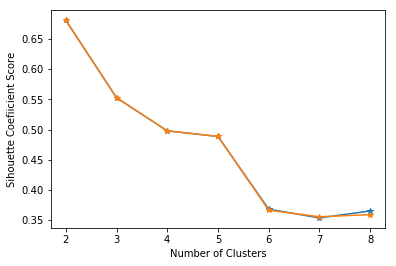

In [33]:
clusters = [2,3,4,5,6,7,8]
sc_scores = []
#计算各个簇模型的轮廓系数
for i in clusters:
    kmeans = KMeans( n_clusters = i).fit(X)
    sc = metrics.silhouette_score( X, kmeans.labels_, metric='euclidean' )
    sc_scores.append( sc )
#绘制曲线图反应轮廓系数与簇数的关系
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sihouette Coefiicient Score')
plt.show()